In [2]:
import pandas as pd

df = pd.read_csv('bitcoin_2017_to_2023.csv')

df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [3]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [4]:
df = df.drop('timestamp', axis='columns')
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...
3125995,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


In [5]:
df.var()

open                            2.578900e+08
high                            2.582211e+08
low                             2.575610e+08
close                           2.578903e+08
volume                          9.553865e+03
quote_asset_volume              5.456281e+12
number_of_trades                3.304443e+06
taker_buy_base_asset_volume     2.472954e+03
taker_buy_quote_asset_volume    1.423572e+12
dtype: float64

<h1> Inference can be Drawn </h1>
- First the high increased significantly and then dropped gradually 

In [6]:
# Here we can consider the open, volume, quote_asset_volume,taker_buy_base_asset_volume,	taker_buy_quote_asset_volume as our dependent variables 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = df[['open', 'close', 'high', 'low', 'number_of_trades', 'quote_asset_volume']].astype(int).head(10000)
y = df.volume.astype(int).head(10000)


# I have commented because pipeline has been prepared 
# scaler = StandardScaler()

# X = scaler.fit_transform(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.2)

In [7]:
lr_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('logisticRegression', LogisticRegression()),
])

svm_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('svc', SVC()),
])

rf_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('randomForest', RandomForestClassifier()),
])

In [8]:
svm_pipeline.set_params(svc__kernel='rbf').fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('svc', SVC())])

In [9]:
svm_pipeline.score(X_test, y_test)

0.167

In [10]:
svm_pipeline.set_params(svc__kernel='poly').fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('svc', SVC(kernel='poly'))])

In [11]:
svm_pipeline.score(X_test, y_test)

0.0845

In [13]:
svm_pipeline.set_params(svc__kernel='sigmoid').fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('svc', SVC(kernel='sigmoid'))])

In [14]:
svm_pipeline.score(X_test, y_test)

0.103

In [15]:
lr_pipeline.set_params(logisticRegression__C = 2).fit(X_train, y_train)

d:\Code Ka Baap\DMS\CP\mlEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaling', StandardScaler()),
                ('logisticRegression', LogisticRegression(C=2))])

In [16]:
lr_pipeline.score(X_test, y_test)

0.1875

In [17]:
rf_pipeline.set_params(randomForest__n_estimators = 30).fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('randomForest', RandomForestClassifier(n_estimators=30))])

In [24]:
y_predict = rf_pipeline.predict(X_test)

In [18]:
rf_pipeline.score(X_test, y_test)

0.811

# Algo1 SVC

In [6]:
kernel = ['rbf', 'poly', 'sigmoid']

for k in kernel : 
    svc = SVC(kernel= k)
    svc.fit(X_train, y_train)
    print(f'Accuracy on {k} testing model is : ', svc.score(X_test, y_test))
    print(f'Accuracy on {k} training model is : ', svc.score(X_train, y_train))

Accuracy on rbf testing model is :  0.1815
Accuracy on rbf training model is :  0.18925
Accuracy on poly testing model is :  0.085
Accuracy on poly training model is :  0.11575
Accuracy on sigmoid testing model is :  0.1075
Accuracy on sigmoid training model is :  0.090375


# Algo2 Logistic Regression 

In [7]:
lr = LogisticRegression(C = 0.01, penalty='l2')

lr.fit(X_train, y_train) 

LogisticRegression(C=0.01)

In [8]:
lr.score(X_test, y_test)

0.082

# Algo3 Random Forest 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [10]:
rf.score(X_test, y_test)

0.795

# Algo4 Linear Regression 

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9997187937112612

# Time Series Forecasting 

In [2]:
big_df = pd.read_csv('bitcoin_2017_to_2023.csv')

big_df = big_df.head(10000)
big_df.shape

(10000, 10)

Test Statistic                -1.260472e+01
p-value                        1.705764e-23
#Lags Used                     2.700000e+01
Number of Observations Used    9.972000e+03
Critical Value (1%)           -3.431006e+00
Critical Value (5%)           -2.861830e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


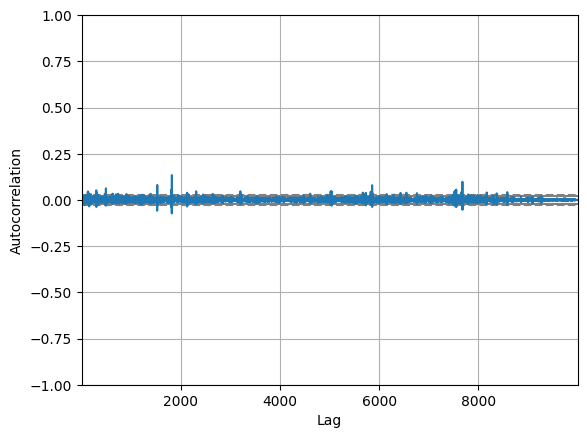

d:\Code Ka Baap\College\mlEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Code Ka Baap\College\mlEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Code Ka Baap\College\mlEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Code Ka Baap\College\mlEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Code Ka Baap\College\mlEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is avai

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot


def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

dfoutput = test_stationarity(big_df['volume'])
print(dfoutput)


big_df['volume_diff'] = big_df['volume'] - big_df['volume'].shift(1)
big_df = big_df.dropna()


autocorrelation_plot(big_df['volume_diff'])
plt.show()


model = ARIMA(big_df['volume_diff'], order=(1,2,1))
model_fit = model.fit()


forecast = model_fit.forecast(steps=10)

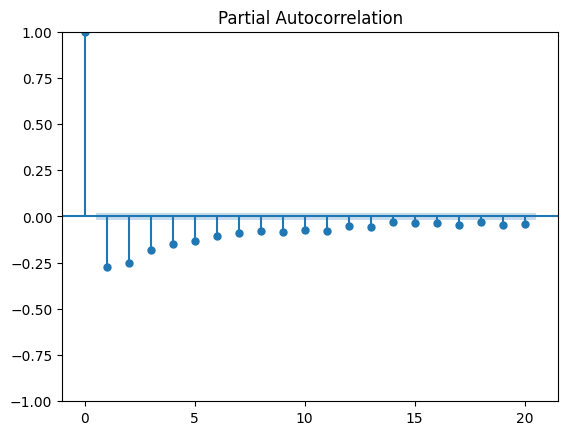

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt 
%matplotlib inline 

big_df['volume_diff'] = big_df['volume'] - big_df['volume'].shift(1)
plot_pacf(big_df['volume_diff'].dropna(), lags=20)
plt.show()